In [54]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


In [34]:
reddit = pd.read_csv('cleaned_dataframes/reddit_cleaned_df.csv')
cnn = pd.read_csv('cleaned_dataframes/cnn_cleaned_df.csv')
foxnews = pd.read_csv('cleaned_dataframes/foxnews_cleaned_df.csv')
newsapi = pd.read_csv('cleaned_dataframes/newsapi_cleaned_df.csv')

In [35]:
reddit["source"] = "reddit"
cnn["source"] = "cnn"
foxnews["source"] = "foxnews"
newsapi["source"] = "newsapi"


In [36]:
for df in [reddit, cnn, foxnews, newsapi]:
    if "Label" in df.columns:
        df.drop(columns=["Label"], inplace=True)

In [37]:
combined_df = pd.concat([reddit, cnn, foxnews, newsapi], ignore_index=True)

In [38]:
combined_df.tail()

,Content,source
821,pakistan cracks free speech online pakistan ad...,newsapi
822,harvard agrees adopt broad definition antisemi...,newsapi
823,deepseek panic app store description available,newsapi
824,kanye west days controversy super bowl swastik...,newsapi
825,supreme court upholds law banning tiktok decis...,newsapi


In [39]:
combined_df.shape

(826, 2)

In [40]:
combined_df["source"].value_counts()

source
reddit     614
newsapi    200
cnn          6
foxnews      6
Name: count, dtype: int64

In [41]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826 entries, 0 to 825
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Content  826 non-null    object
 1   source   826 non-null    object
dtypes: object(2)
memory usage: 13.0+ KB


In [42]:
combined_df["Content"].sample(5).values

array(['cmv really honestly unironically worried fascist government near future pro final edit real significant portion thread directly address point instead asserts without real reason believe military unbeatable matter address please see post regarding issue discuss instead distracting post bad link check hours know sides sling accusations sides wanting authoritarian dystopia respective flavours opinion goes ways anyone legitimately worried either kamala starting wwiii generating hurricanes destroy republican states trump rewriting constitution become america first dictator absolutely support even armed everyone stuff willing participate armed conflict theoretical oppressive regime even logical reason actively opposed willing less less weaponry common argument needs machine guns somehow coexists going army without considering maybe access machine guns fight army really worried hostile authoritarian regime white house anytime soon pinning hope resistance freedom fighters armed teeth f

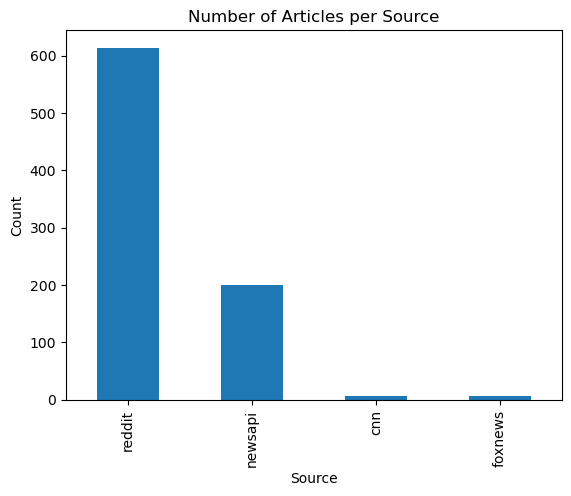

In [43]:

combined_df['source'].value_counts().plot(kind='bar')
plt.title("Number of Articles per Source")
plt.xlabel("Source")
plt.ylabel("Count")
plt.show()

In [44]:
combined_df['label'] = combined_df['source'].map(lambda x: 'article' if x in ['cnn', 'foxnews', 'newsapi'] else 'post')


In [45]:
combined_df.head()

,Content,source,label
0,idea free speech free speech right say want cr...,reddit,post
1,kamala harris stated use justice department co...,reddit,post
2,whole fiasco shows left greatest threat free s...,reddit,post
3,thoughts balance free speech need combat misin...,reddit,post
4,nazis woke enemies democracy think free speech...,reddit,post


In [46]:
combined_df["label"].value_counts()

label
post       614
article    212
Name: count, dtype: int64

In [47]:
combined_df.drop("source", axis=1, inplace=True)

In [48]:
combined_df.head()

,Content,label
0,idea free speech free speech right say want cr...,post
1,kamala harris stated use justice department co...,post
2,whole fiasco shows left greatest threat free s...,post
3,thoughts balance free speech need combat misin...,post
4,nazis woke enemies democracy think free speech...,post


In [49]:
combined_df.rename(columns={"Content": "text"}, inplace=True)

In [50]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(combined_df['label'])

In [51]:
list(le.classes_)

['article', 'post']

In [53]:
vectorizer = TfidfVectorizer(max_features = 5000, stop_words='english')
X = vectorizer.fit_transform(combined_df['text']).toarray()

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [62]:


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential


In [64]:

model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

In [65]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [66]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1,  # 10% of training data used for validation
    verbose=1
)

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6690 - loss: 0.6362 - val_accuracy: 0.6667 - val_loss: 0.6275
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7519 - loss: 0.4061 - val_accuracy: 0.8788 - val_loss: 0.3468
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9561 - loss: 0.2295 - val_accuracy: 0.9545 - val_loss: 0.1624
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0586 - val_accuracy: 0.9545 - val_loss: 0.0793
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0146 - val_accuracy: 0.9545 - val_loss: 0.0887
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0037 - val_accuracy: 0.9697 - val_loss: 0.0771
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 0.9697 - val_loss: 0.0752
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.9697 - val_loss:

In [67]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9255 - loss: 0.1806 


In [68]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Get predictions as class labels (0 or 1)
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Optional: classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Confusion Matrix:
[[ 33  10]
 [  2 121]]

Classification Report:
              precision    recall  f1-score   support

     article       0.94      0.77      0.85        43
        post       0.92      0.98      0.95       123

    accuracy                           0.93       166
   macro avg       0.93      0.88      0.90       166
weighted avg       0.93      0.93      0.93       166



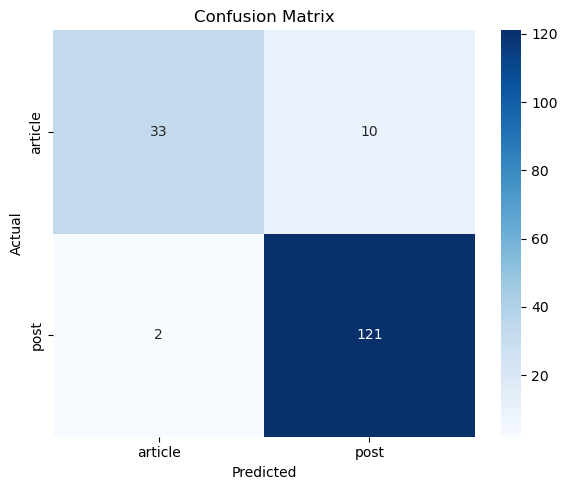

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels
labels = le.classes_  # ['article', 'post']

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

